In [1]:
# Step 1: Importing required libraries

import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [2]:
suv_data=pd.read_csv("datasets/suv_data.csv")

In [3]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
suv_data_final=suv_data[["Age","EstimatedSalary","Purchased"]]

In [5]:
suv_data_final.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
# Step 2: Split data into two parts
x = suv_data_final[["Age","EstimatedSalary"]]

y = suv_data_final["Purchased"]

In [7]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
# Step 4: train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=4)

In [10]:
x_train

,Age,EstimatedSalary
153,36,50000
42,35,108000
339,39,122000
128,30,17000
102,32,86000
...,...,...
360,43,129000
385,56,60000
197,20,36000
174,34,72000


In [11]:
x_test

,Age,EstimatedSalary
184,33,60000
6,27,84000
61,25,87000
312,38,50000
100,27,88000
...,...,...
123,35,53000
244,41,72000
193,19,70000
225,37,53000


In [12]:
y_train

153    0
42     0
339    1
128    0
102    0
      ..
360    1
385    1
197    0
174    0
122    0
Name: Purchased, Length: 320, dtype: int64

In [13]:
y_test

184    0
6      0
61     0
312    0
100    0
      ..
123    0
244    0
193    0
225    0
233    1
Name: Purchased, Length: 80, dtype: int64

In [14]:
# Step 5: Make an instance of the requires Machine Learning Model
Logistic_Regression = LogisticRegression()

In [15]:
# Step 6: Train the Logistic Regression Model
Logistic_Regression_Trained_Model=Logistic_Regression.fit(x_train,y_train)

In [16]:
# Step 7: Makind a prediction from the trained Model aka testing the model
predict_y = Logistic_Regression_Trained_Model.predict(x_test)

In [17]:
# Step 8: Testing the model against various metrics
accuracy_score=accuracy_score(y_test, predict_y)
accuracy_score

0.9

In [18]:
#Step 8: Calculate AUC
auc_score = roc_auc_score(y_test, Logistic_Regression_Trained_Model.predict_proba(x_test)[:, 1])
print(f"AUC: {auc_score}")

AUC: 0.9305891848264729


Text(95.72222222222221, 0.5, 'Actual')

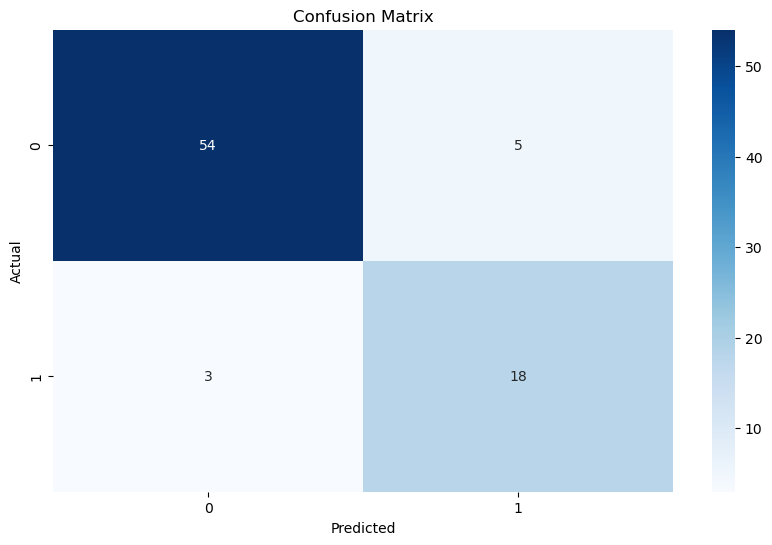

In [19]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, predict_y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

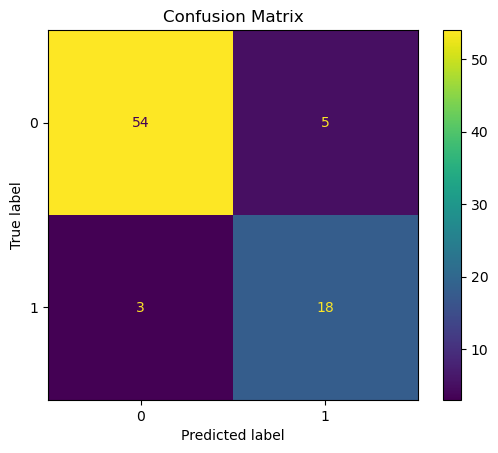

In [20]:
#Alternative Way of Displaying Confusion Matrix Using Inbuilt Confusion Matrix Display Function
cm = confusion_matrix(y_test,
                      predict_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

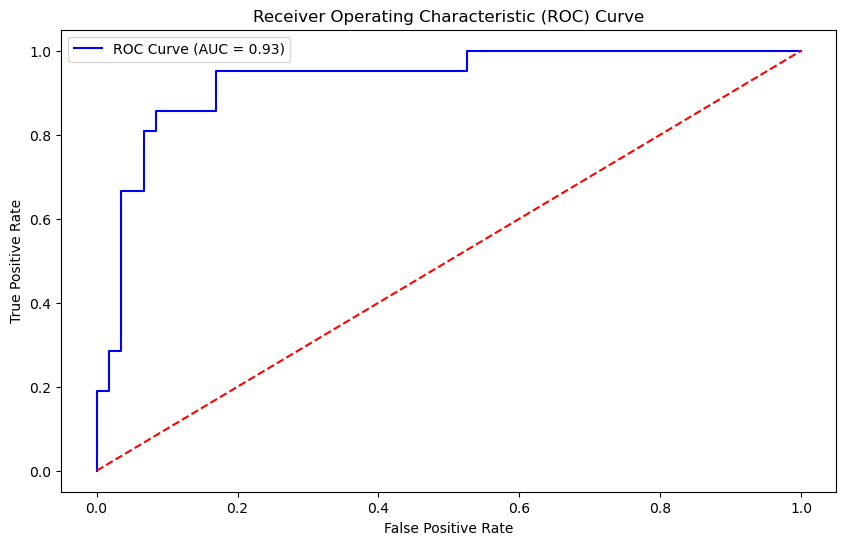

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.78      0.86      0.82        21

    accuracy                           0.90        80
   macro avg       0.86      0.89      0.87        80
weighted avg       0.90      0.90      0.90        80



In [21]:
# Step 9: Visualizing and Ploting ROC Curve
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, Logistic_Regression_Trained_Model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [29]:
# Classification Report
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.78      0.86      0.82        21

    accuracy                           0.90        80
   macro avg       0.86      0.89      0.87        80
weighted avg       0.90      0.90      0.90        80



Text(0, 0.5, 'Estimated Salary')

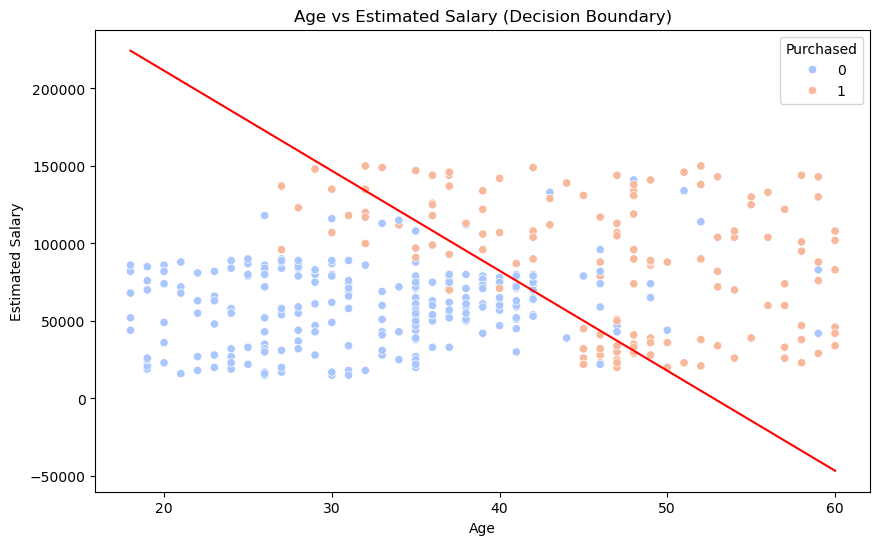

In [31]:
# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of data points
sns.scatterplot(data=suv_data_final, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm')

# Decision boundary
coef = Logistic_Regression_Trained_Model.coef_[0]
intercept = Logistic_Regression_Trained_Model.intercept_
xx = np.linspace(x['Age'].min(), x['Age'].max(), 100)
yy = -(coef[0] * xx + intercept) / coef[1]
plt.plot(xx, yy, color='red', linestyle='-')

plt.title('Age vs Estimated Salary (Decision Boundary)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')


In [32]:
# Create DataFrame for Visualization 
#visualization_df[["Age","EstimatedSalary"]]=pd.DataFrame(x_test)

In [33]:
#print(visualization_df.columns.tolist())

In [34]:
#visualization_df

In [35]:
#visualization_df['Buy_SUV'] = y_test # Ensure this matches your prediction variable
#visualization_df['Predicted'] = predict_y  # Ensure this matches your prediction variable

In [36]:
#visualization_df

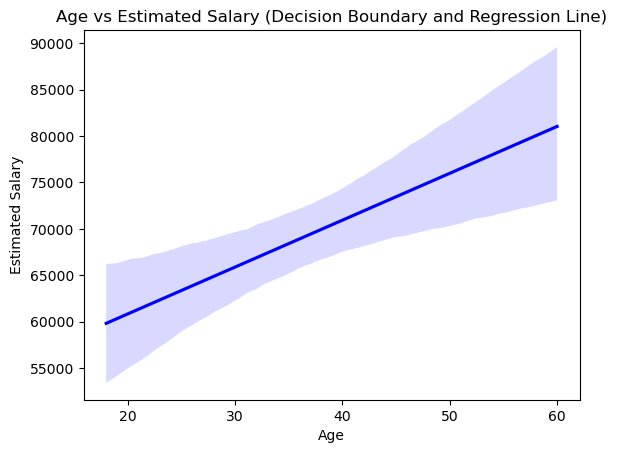

In [37]:
# Regression line formed for the trained model
sns.regplot(x='Age', y='EstimatedSalary', data=suv_data, scatter=False, color='blue')

plt.title('Age vs Estimated Salary (Decision Boundary and Regression Line)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()